# ループの作成と制御方法

- https://langchain-ai.github.io/langgraph/how-tos/recursion-limit/

In [6]:
import operator
from typing import Annotated, Literal

from typing_extensions import TypedDict

from langgraph.graph import StateGraph, START, END


class State(TypedDict):
    aggregate: Annotated[list, operator.add]


def a(state: State):
    print(f"Node A sees {state["aggregate"]}")
    return {"aggregate": ["A"]}


def b(state: State):
    print(f"Node B sees {state["aggregate"]}")
    return {"aggregate": ["B"]}


builder = StateGraph(State)
builder.add_node(a)
builder.add_node(b)

def route(state: State) -> Literal["b", END]:
    if len(state["aggregate"]) < 7:
        return "b"
    else:
        return END


builder.add_edge(START, "a")
builder.add_conditional_edges("a", route)
builder.add_edge("b", "a")
graph = builder.compile()

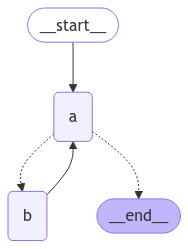

In [7]:
from IPython.display import Image, display

display(Image(graph.get_graph().draw_mermaid_png()))

In [8]:
graph.invoke({"aggregate": []})

Node A sees []
Node B sees ['A']
Node A sees ['A', 'B']
Node B sees ['A', 'B', 'A']
Node A sees ['A', 'B', 'A', 'B']
Node B sees ['A', 'B', 'A', 'B', 'A']
Node A sees ['A', 'B', 'A', 'B', 'A', 'B']


{'aggregate': ['A', 'B', 'A', 'B', 'A', 'B', 'A']}

In [11]:
# 再帰制限を課す
from langgraph.errors import GraphRecursionError

try:
    graph.invoke({"aggregate": []}, {"recursion_limit": 4})
except GraphRecursionError:
    print("Recursion Error")

Node A sees []
Node B sees ['A']
Node A sees ['A', 'B']
Node B sees ['A', 'B', 'A']
Recursion Error


In [12]:
# 無限ループ
import operator
from typing import Annotated, Literal

from typing_extensions import TypedDict

from langgraph.graph import StateGraph, START, END


class State(TypedDict):
    aggregate: Annotated[list, operator.add]


def a(state: State):
    print(f"Node A sees {state["aggregate"]}")
    return {"aggregate": ["A"]}


def b(state: State):
    print(f"Node B sees {state["aggregate"]}")
    return {"aggregate": ["B"]}


builder = StateGraph(State)
builder.add_node(a)
builder.add_node(b)

def route(state: State) -> Literal["b"]:
    return "b"


builder.add_edge(START, "a")
builder.add_conditional_edges("a", route)
builder.add_edge("b", "a")
graph = builder.compile()

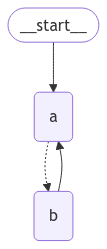

In [13]:
from IPython.display import Image, display

display(Image(graph.get_graph().draw_mermaid_png()))

In [19]:
# デフォルトでは recursion_limit が 25 に設定されている
# 無限ループはしない
# https://langchain-ai.github.io/langgraph/concepts/low_level/#recursion-limit
from langgraph.errors import GraphRecursionError

try:
    graph.invoke({"aggregate": []})
except GraphRecursionError as e:
    print("Recursion Error:", e)

Node A sees []
Node B sees ['A']
Node A sees ['A', 'B']
Node B sees ['A', 'B', 'A']
Node A sees ['A', 'B', 'A', 'B']
Node B sees ['A', 'B', 'A', 'B', 'A']
Node A sees ['A', 'B', 'A', 'B', 'A', 'B']
Node B sees ['A', 'B', 'A', 'B', 'A', 'B', 'A']
Node A sees ['A', 'B', 'A', 'B', 'A', 'B', 'A', 'B']
Node B sees ['A', 'B', 'A', 'B', 'A', 'B', 'A', 'B', 'A']
Node A sees ['A', 'B', 'A', 'B', 'A', 'B', 'A', 'B', 'A', 'B']
Node B sees ['A', 'B', 'A', 'B', 'A', 'B', 'A', 'B', 'A', 'B', 'A']
Node A sees ['A', 'B', 'A', 'B', 'A', 'B', 'A', 'B', 'A', 'B', 'A', 'B']
Node B sees ['A', 'B', 'A', 'B', 'A', 'B', 'A', 'B', 'A', 'B', 'A', 'B', 'A']
Node A sees ['A', 'B', 'A', 'B', 'A', 'B', 'A', 'B', 'A', 'B', 'A', 'B', 'A', 'B']
Node B sees ['A', 'B', 'A', 'B', 'A', 'B', 'A', 'B', 'A', 'B', 'A', 'B', 'A', 'B', 'A']
Node A sees ['A', 'B', 'A', 'B', 'A', 'B', 'A', 'B', 'A', 'B', 'A', 'B', 'A', 'B', 'A', 'B']
Node B sees ['A', 'B', 'A', 'B', 'A', 'B', 'A', 'B', 'A', 'B', 'A', 'B', 'A', 'B', 'A', 'B', 'A']